<a href="https://colab.research.google.com/github/reg4762/PVCK_Ganjil_2024/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Job Sheet 3
## Nama : Regita Delya Putri
## Absen : 21
## Nim : 2241720137
## Kelas : TI-3F

## Praktikum

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [16]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

Mengubah tingkat kecerahan citra
--------------------------------
Masukkan nilai kecerahan: 50


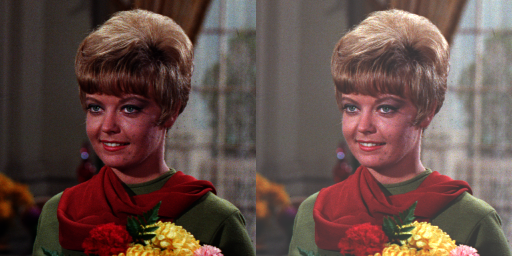

In [3]:
print('Mengubah tingkat kecerahan citra')
print('--------------------------------')

try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PVCK/Images/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

#cara simple tanpa for loop
#brightness_image = cv.convertScaleAbs(original, beta=brigtness)
final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

## Tugas Praktikum

### 1. Implementasikan inverse citra pada Google Colaboratory menggunakan formula yang terdapat pada bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut:

Implementasi inverse citra
--------------------------


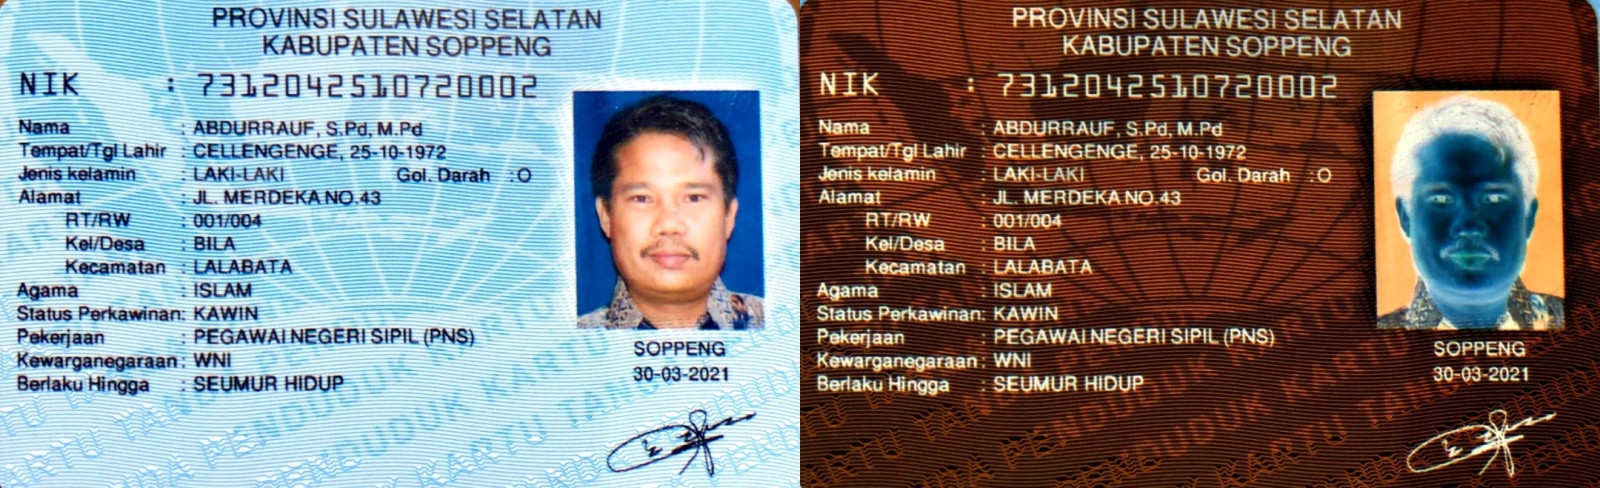

In [12]:
print('Implementasi inverse citra')
print('--------------------------')

ktp = cv.imread('/content/drive/MyDrive/PVCK/Images/KTP7.jpeg')
inverse_citra = np.zeros(ktp.shape, ktp.dtype)

#akses per piksel
for y in range(ktp.shape[0]):
  for x in range(ktp.shape[1]):
    for c in range(ktp.shape[2]):
      inverse_citra[y,x,c] = np.abs(255-ktp[y,x,c])

final_frame = cv.hconcat((ktp, inverse_citra))
cv2_imshow(final_frame)

### 2. Implementasikan transformasi contrast pada Google Colaboratory menggunakan formula yang terdapat pada bagian Ulasan Teori untuk kontras, sehingga menghasilkan keluaran seperti berikut:

Mengubah kontras dan tingkat kecerahan citra
--------------------------------------------
Masukkan tingkat kecerahan [-255 - 255]: 50
Masukkan kontras [1.0 - 3.0]: 2


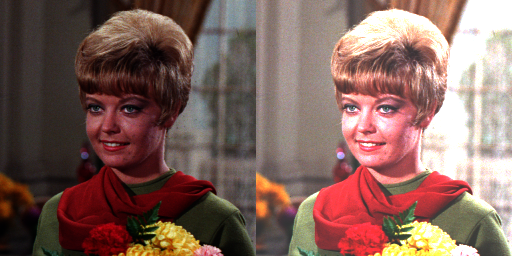

In [5]:
print('Mengubah kontras dan tingkat kecerahan citra')
print('--------------------------------------------')

try:
  brightness = int(input('Masukkan tingkat kecerahan [-255 - 255]: '))
  contrast = int(input('Masukkan kontras [1.0 - 3.0]: '))
except ValueError:
  print('Error, not a number')

original2 = cv.imread('/content/drive/MyDrive/PVCK/Images/female.tiff')
brightness_image = np.zeros(original2.shape, original2.dtype)

#akses per piksel
for y in range(original2.shape[0]):
  for x in range(original2.shape[1]):
    for c in range(original2.shape[2]):
      brightness_image[y,x,c] = np.clip(contrast * original2[y,x,c] + brightness, 0, 255)

final_frame = cv.hconcat((original2, brightness_image))
cv2_imshow(final_frame)

### 3. Implementasikan transformasi logarithmic brightness pada Google Colaboratory menggunakan formula yang terdapat pada bagian Ulasan Teori untuk transformasi log, sehingga menghasilkan keluaran seperti berikut:

Mengubah tingkat kecerahan citra dengan Transformasi Log
--------------------------------------------------------
Masukkan nilai kecerahan: 50


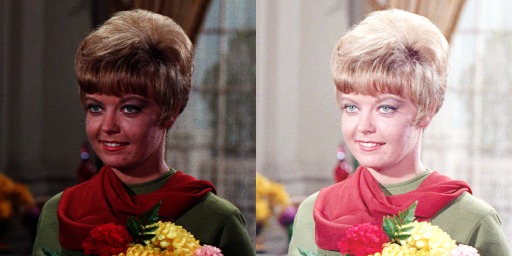

In [8]:
import math

print('Mengubah tingkat kecerahan citra dengan Transformasi Log')
print('--------------------------------------------------------')

try:
  brightness = float(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

original3 = cv.imread('/content/drive/MyDrive/PVCK/Images/female.tiff')
log_brightness_image = np.zeros(original3.shape, original3.dtype)

#akses per piksel
for y in range(original3.shape[0]):
  for x in range(original3.shape[1]):
    for c in range(original3.shape[2]):
      log_brightness_image[y,x,c] = np.clip(brightness * math.log(1 + original3[y,x,c]), 0, 255)

final_frame = cv.hconcat((original3, log_brightness_image))
cv2_imshow(final_frame)


### 4. Implementasikan transformasi grayscale menggunakan metode averaging, lightness, dan luminance pada Google Colaboratory menggunakan formula yang terdapat pada bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut:

a.   Averaging








Mengubah citra ke grayscale dengan metode averaging
---------------------------------------------------


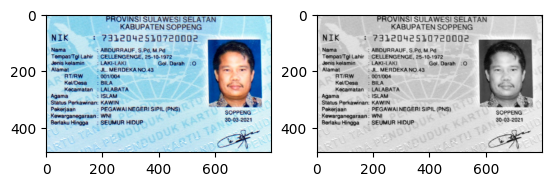

In [45]:
print('Mengubah citra ke grayscale dengan metode averaging')
print('---------------------------------------------------')

# Membaca gambar
ktp1 = cv2.imread('/content/drive/MyDrive/PVCK/Images/KTP7.jpeg')
ktp1 = cv.cvtColor(ktp1,cv.COLOR_BGR2RGB)
# Membuat array untuk gambar grayscale
grayscale_averaging = np.zeros((ktp1.shape[0], ktp1.shape[1]), dtype=np.uint8)

# Akses per piksel
for y in range(ktp1.shape[0]):
    for x in range(ktp1.shape[1]):
        # Menggunakan tipe data int untuk menghindari overflow
        red = int(ktp1[y, x, 2])
        green = int(ktp1[y, x, 1])
        blue = int(ktp1[y, x, 0])
        # Hitung rata-rata untuk nilai grayscale
        gray_value = (red + green + blue) // 3  # Menggunakan pembagian integer
        # Simpan nilai grayscale ke gambar grayscale
        grayscale_averaging[y, x] = np.clip(gray_value, 0, 255)

# Menampilkan gambar asli dan gambar grayscale
grayscale_averaging_bgr = cv2.cvtColor(grayscale_averaging, cv2.COLOR_GRAY2BGR)
fig, ax = plt.subplots(1,2)
ax[0].imshow(ktp1)
ax[1].imshow(grayscale_averaging_bgr)



b.   Lightness

Mengubah citra ke grayscale dengan metode lightness
---------------------------------------------------


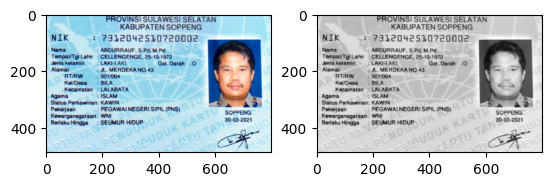

In [46]:
print('Mengubah citra ke grayscale dengan metode lightness')
print('---------------------------------------------------')

# Membaca gambar
ktp2 = cv2.imread('/content/drive/MyDrive/PVCK/Images/KTP7.jpeg')
ktp2 = cv.cvtColor(ktp2,cv.COLOR_BGR2RGB)

# Membuat array untuk gambar grayscale dengan tipe data yang tepat
grayscale_lightness = np.zeros((ktp2.shape[0], ktp2.shape[1]), dtype=np.uint8)

# Akses per piksel
for y in range(ktp2.shape[0]):
    for x in range(ktp2.shape[1]):
        red = int(ktp2[y, x, 2])
        green = int(ktp2[y, x, 1])
        blue = int(ktp2[y, x, 0])
        rgb = [red, green, blue]
        # Hitung nilai grayscale menggunakan metode lightness
        gray_value = (np.max(rgb) + np.min(rgb)) / 2
        # Simpan nilai grayscale ke gambar grayscale
        grayscale_lightness[y, x] = np.clip(gray_value, 0, 255)

# Konversi gambar grayscale ke BGR untuk penggabungan
grayscale_lightness_bgr = cv2.cvtColor(grayscale_lightness, cv2.COLOR_GRAY2BGR)

# Menampilkan gambar asli dan gambar grayscale berdampingan
final_frame = cv2.hconcat([ktp2, grayscale_lightness_bgr])
fig, ax = plt.subplots(1,2)
ax[0].imshow(ktp2)
ax[1].imshow(grayscale_lightness_bgr)

c.   Luminance



Mengubah citra ke grayscale dengan metode luminance
---------------------------------------------------


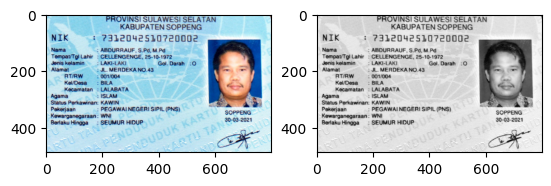

In [48]:
print('Mengubah citra ke grayscale dengan metode luminance')
print('---------------------------------------------------')

# Membaca gambar
ktp3 = cv2.imread('/content/drive/MyDrive/PVCK/Images/KTP7.jpeg')
ktp3 = cv.cvtColor(ktp3,cv.COLOR_BGR2RGB)

# Membuat array untuk gambar grayscale
grayscale_luminance = np.zeros((ktp3.shape[0], ktp3.shape[1]), dtype=np.uint8)

# Akses per piksel
for y in range(ktp3.shape[0]):
    for x in range(ktp3.shape[1]):
        red = ktp3[y, x, 2]
        green = ktp3[y, x, 1]
        blue = ktp3[y, x, 0]
        # Hitung nilai grayscale menggunakan metode luminance
        gray_value = 0.21 * red + 0.72 * green + 0.07 * blue
        # Simpan nilai grayscale ke gambar grayscale
        grayscale_luminance[y, x] = np.clip(gray_value, 0, 255)

# Menampilkan gambar asli dan gambar grayscale berdampingan
grayscale_luminance_bgr = cv2.cvtColor(grayscale_luminance, cv2.COLOR_GRAY2BGR)
fig, ax = plt.subplots(1,2)
ax[0].imshow(ktp2)
ax[1].imshow(grayscale_luminance_bgr)


### 5. Tampilkanlah warna tertentu pada citra, dan ubah warna lain menjadi grayscale. Misal, tampilkan warna biru pada citra masukan dan ubah bagian lain yang tidak berwarna biru menjadi grayscale seperti pada contoh berikut:

Menampilkan warna tertentu pada citra, dan ubah warna lain menjadi grayscale
----------------------------------------------------------------------------


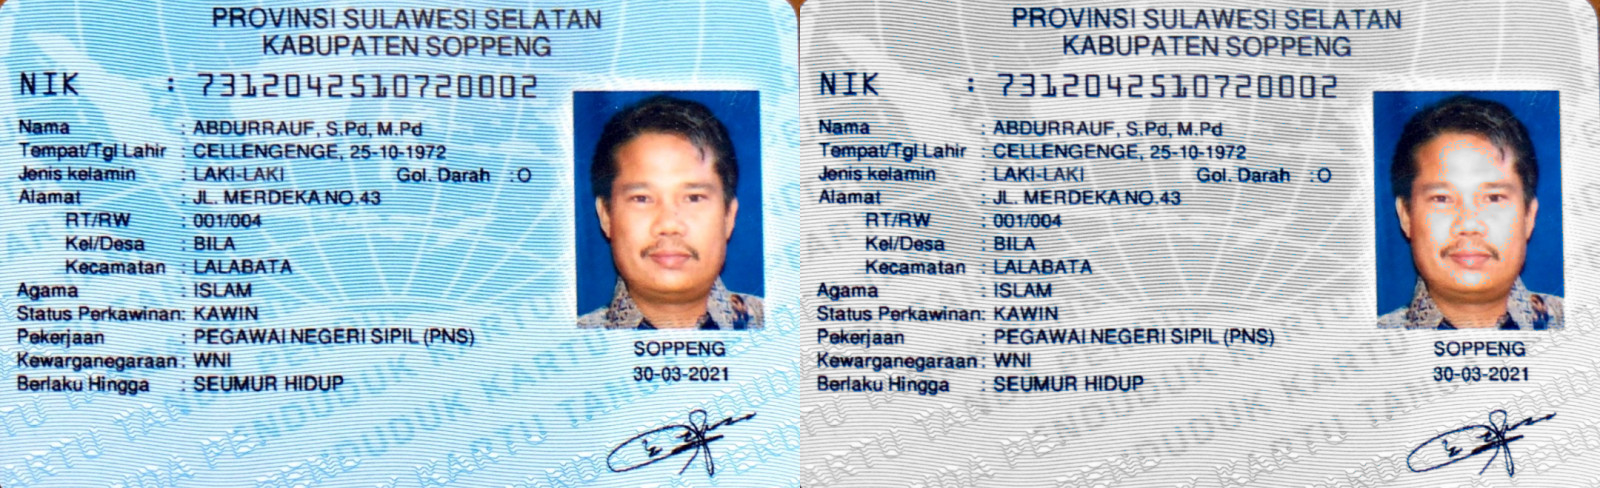

In [50]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow  # For displaying images in Google Colab

print('Menampilkan warna tertentu pada citra, dan ubah warna lain menjadi grayscale')
print('----------------------------------------------------------------------------')

# Membaca gambar
ktp4 = cv2.imread('/content/drive/MyDrive/PVCK/Images/KTP7.jpeg')

# Membuat array untuk gambar grayscale
gray_image_specific_color = np.zeros(ktp4.shape, dtype=np.uint8)

# Akses per piksel
for y in range(ktp4.shape[0]):
    for x in range(ktp4.shape[1]):
        red = ktp4[y, x, 2]
        green = ktp4[y, x, 1]
        blue = ktp4[y, x, 0]

        # Memeriksa apakah piksel berwarna biru atau warna kulit
        if (blue > 100 and red < 100 and green < 100) or (red < 255 and green < 205 and blue < 204):
            # Jika biru atau warna kulit, gunakan warna asli
            gray_image_specific_color[y, x] = ktp4[y, x]
        else:
            # Jika bukan biru atau warna kulit, ubah menjadi grayscale
            gray_value = 0.21 * red + 0.72 * green + 0.07 * blue
            gray_image_specific_color[y, x] = [gray_value, gray_value, gray_value]

# Menampilkan gambar asli dan gambar dengan warna tertentu
final_frame = cv2.hconcat([ktp4, gray_image_specific_color])
cv2_imshow(final_frame)

## Percobaan


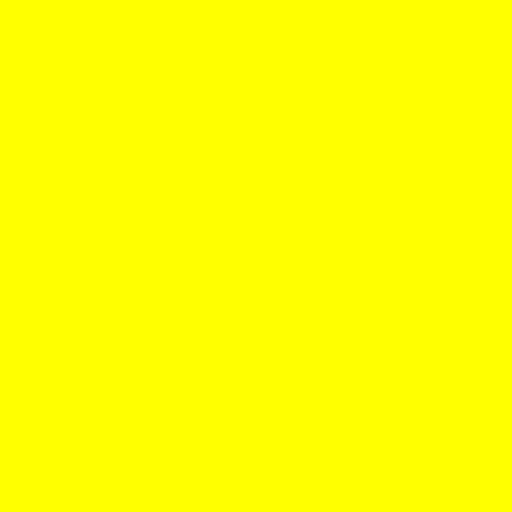

In [51]:
yellow_img = np.zeros((512,512,3), np.uint8)
yellow_img[:,:] = (0,255,255)
cv2_imshow(yellow_img)

Mengubah citra ke grayscale dengan metode luminance
--------------------------------


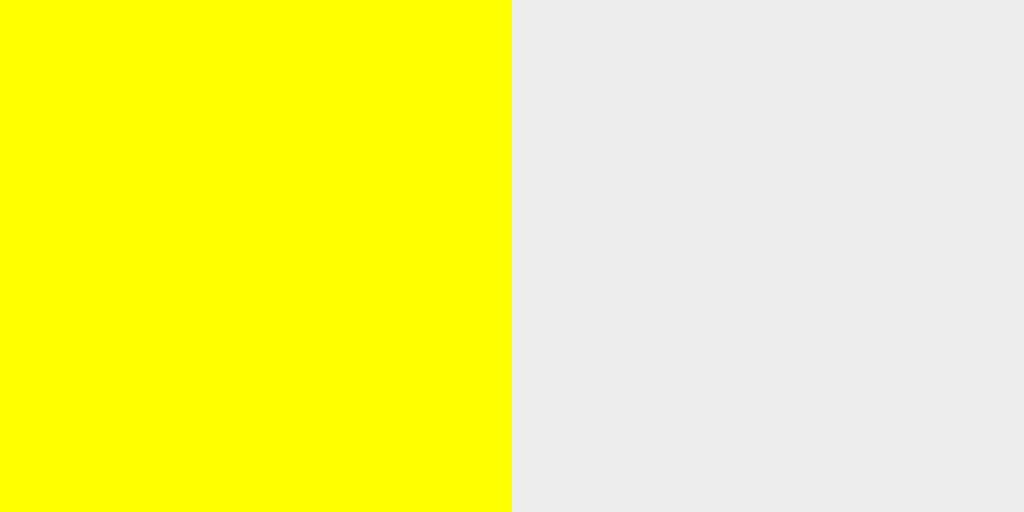

In [52]:
print('Mengubah citra ke grayscale dengan metode luminance')
print('--------------------------------')

# Membaca gambar
gray = yellow_img

# Membuat array untuk gambar grayscale
gray_image_luminance = np.zeros((gray.shape[0], gray.shape[1]), dtype=np.uint8)

# Akses per piksel
for y in range(gray.shape[0]):
    for x in range(gray.shape[1]):
        red = gray[y, x, 2]
        green = gray[y, x, 1]
        blue = gray[y, x, 0]
        # Hitung nilai grayscale menggunakan metode luminance
        gray_value = 0.21 * red + 0.72 * green + 0.07 * blue
        # Simpan nilai grayscale ke gambar grayscale
        gray_image_luminance[y, x] = np.clip(gray_value, 0, 255)

# Menampilkan gambar asli dan gambar grayscale berdampingan
gray_image_luminance = cv2.cvtColor(gray_image_luminance, cv2.COLOR_GRAY2BGR)
final_frame = cv2.hconcat([gray, gray_image_luminance])
cv2_imshow(final_frame)


Menampilkan warna tertentu pada citra, dan ubah warna lain menjadi grayscale
----------------------------------------------------------------------------


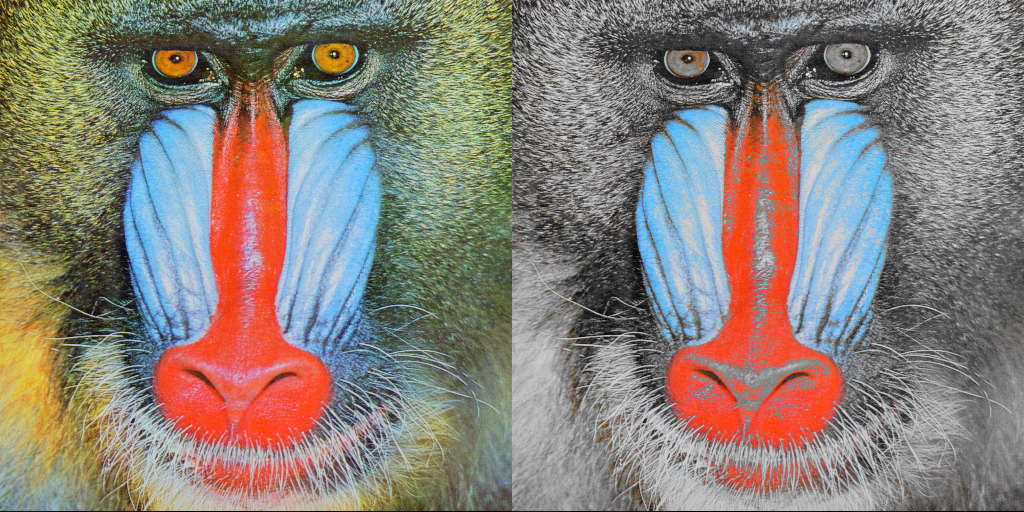

In [54]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

print('Menampilkan warna tertentu pada citra, dan ubah warna lain menjadi grayscale')
print('----------------------------------------------------------------------------')

# Membaca gambar
mandrill = cv2.imread('/content/drive/MyDrive/PVCK/Images/mandrill.tiff')

# Membuat array untuk gambar grayscale
gray_image_specific_color = np.zeros(mandrill.shape, dtype=np.uint8)

# Akses per piksel
for y in range(mandrill.shape[0]):
    for x in range(mandrill.shape[1]):
        red = mandrill[y, x, 2]
        green = mandrill[y, x, 1]
        blue = mandrill[y, x, 0]

        # Memeriksa apakah piksel berwarna biru atau merah
        if (red < 200 and green < 200 and blue > 200) or (red > 100 and green < 100 and blue < 100):
            # Jika biru atau merah, gunakan warna asli
            gray_image_specific_color[y, x] = mandrill[y, x]
        else:
            # Jika bukan biru atau merah, ubah menjadi grayscale
            gray_value = 0.21 * red + 0.72 * green + 0.07 * blue
            gray_image_specific_color[y, x] = [gray_value, gray_value, gray_value]

# Menampilkan gambar asli dan gambar dengan warna tertentu
final_frame = cv2.hconcat([mandrill, gray_image_specific_color])
cv2_imshow(final_frame)